In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('........./goibibo_flights.csv')

In [3]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [4]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   flight date  300261 non-null  object 
 1   airline      300261 non-null  object 
 2   flight_num   300261 non-null  object 
 3   class        300261 non-null  object 
 4   from         300261 non-null  object 
 5   dep_time     300261 non-null  object 
 6   to           300261 non-null  object 
 7   arr_time     300261 non-null  object 
 8   duration     300261 non-null  object 
 9   price        300261 non-null  object 
 10  stops        300261 non-null  object 
 11  Unnamed: 11  0 non-null       float64
 12  Unnamed: 12  0 non-null       float64
dtypes: float64(2), object(11)
memory usage: 205.5 MB


In [5]:
df['stops'] = df['stops'].astype('category')
df['airline'] = df['airline'].astype('category')
df['from'] = df['from'].astype('category')
df['to'] = df['to'].astype('category')

In [6]:
nan_counts = df.isnull().sum()
nan_counts

flight date         0
airline             0
flight_num          0
class               0
from                0
dep_time            0
to                  0
arr_time            0
duration            0
price               0
stops               0
Unnamed: 11    300261
Unnamed: 12    300261
dtype: int64

In [7]:
df.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)

In [8]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   flight date  300261 non-null  object  
 1   airline      300261 non-null  category
 2   flight_num   300261 non-null  object  
 3   class        300261 non-null  object  
 4   from         300261 non-null  category
 5   dep_time     300261 non-null  object  
 6   to           300261 non-null  category
 7   arr_time     300261 non-null  object  
 8   duration     300261 non-null  object  
 9   price        300261 non-null  object  
 10  stops        300261 non-null  category
dtypes: category(4), object(7)
memory usage: 128.5 MB


In [9]:
df.describe()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
count,300261,300261,300261,300261,300261,300261,300261,300261,300261,300261,300261
unique,49,8,1569,2,6,251,6,266,483,12170,40
top,20-07-2023,Vistara,UK-706,economy,Delhi,07:00,Mumbai,19:55,02h 10m,"55,427",1-stop
freq,6633,127859,3235,206774,61345,8760,59109,9194,4242,1445,243603


In [10]:
# Number of unique Airlines
df["airline"].nunique()

8

In [11]:
# Count of flights operated by each airline
df['airline'].value_counts()

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64

In [12]:
# Number of fights depart from each city
df['from'].value_counts()

Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: from, dtype: int64

In [13]:
df.dropna(subset=['duration'], inplace=True)

In [14]:
def convert_to_minutes(duration):
    try:
        if 'h' in duration and 'm' in duration:
            hours = int(duration.split('h')[0]) * 60
            minutes = int(duration.split(' ')[1].replace('m', ''))
            return hours + minutes
        elif 'h' in duration:
            return int(duration.split('h')[0]) * 60
        elif 'm' in duration:
            return int(duration.split('m')[0])
        else:
            return 0 
    except ValueError:
        return 0  

df['duration_minutes'] = df['duration'].apply(convert_to_minutes)


In [15]:
average_duration_by_airline = df.groupby('airline')['duration_minutes'].mean()
print(average_duration_by_airline)

airline
Air India    930.257745
AirAsia      536.489315
GO FIRST     525.236441
Indigo       347.709416
SpiceJet     754.769726
StarAir      145.983607
Trujet       232.073171
Vistara      799.597643
Name: duration_minutes, dtype: float64


In [16]:
# Percentage of non-stop flights
non_stop_percentage = (df[df['stops'] == 'non-stop'].shape[0] / df.shape[0]) * 100
non_stop_percentage

12.004222992663049

### Date and Time analysis

In [17]:
# Distribution of departures by hours
df['dep_hour'] = df['dep_time'].apply(lambda x: int(x.split(':')[0]))
df['dep_hour'].value_counts()

6     27179
7     24174
10    23950
20    23731
9     22167
17    19658
19    18085
21    17788
8     16800
18    15027
12    13604
16    12647
11    12333
13    12142
15    10857
14    10255
5      8269
22     5762
4      2420
23     2223
2       619
0       303
3       170
1        98
Name: dep_hour, dtype: int64

In [19]:
# longest flight by duration for each airline
df.loc[df.groupby('airline')['duration_minutes'].idxmax()]

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,duration_minutes,dep_hour
193997,27-06-2023,Air India,AI-672,economy,Chennai,16:05,Bangalore,17:55,49h 50m,"24,130",2+-stop,2990,16
85367,04-07-2023,AirAsia,I5-2461,economy,Bangalore,16:15,Delhi,11:50,19h 35m,"7,559",2+-stop,1175,16
96507,11-07-2023,GO FIRST,G8-146,economy,Bangalore,05:45,Mumbai,04:15,22h 30m,"5,229",1-stop,1350,5
176482,27-06-2023,Indigo,6E-743,economy,Hyderabad,05:40,Chennai,21:05,15h 25m,"11,958",2+-stop,925,5
61539,26-06-2023,SpiceJet,SG-3440,economy,Mumbai,13:50,Kolkata,17:45,27h 55m,"7,805",1-stop,1675,13
109764,27-06-2023,StarAir,S5-131,economy,Bangalore,14:35,Hyderabad,19:40,05h 05m,"11,496",1-stop,305,14
71637,07-07-2023,Trujet,2T-518,economy,Mumbai,11:40,Hyderabad,19:00,7h 20m,"3,198",1-stop,440,11
194034,28-06-2023,Vistara,UK-822,economy,Chennai,09:45,Bangalore,08:50,47h 05m,"17,395",1-stop,2825,9


In [20]:
# Relation between price and duration
df[['price', 'duration_minutes']].corr()

,duration_minutes
duration_minutes,1.0


In [21]:
# Flghgts by the time of the day
def time_of_day(dep_time):
    hour = int(dep_time.split(':')[0])
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['dep_time'].apply(time_of_day)
df['time_of_day'].value_counts()

morning      134872
evening       76501
afternoon     59505
night         29383
Name: time_of_day, dtype: int64

### Duration Analysis

In [23]:
# Shortest Flight
df.loc[df['duration_minutes'].idxmin()]


flight date         11-07-2023
airline               GO FIRST
flight_num              G8-146
class                  economy
from                 Bangalore
dep_time                 05:45
to                      Mumbai
arr_time                 09:10
duration               1.03h m
price                    5,229
stops                   1-stop
duration_minutes             0
dep_hour                     5
time_of_day            morning
Name: 96486, dtype: object

In [47]:
# Logest Flight
df.loc[df['duration_minutes'].idxmax()]


flight date         27-06-2023
airline              Air India
flight_num              AI-672
class                  economy
from                   Chennai
dep_time                 16:05
to                   Bangalore
arr_time                 17:55
duration               49h 50m
price                   24,130
stops                  2+-stop
duration_minutes          2990
dep_hour                    16
time_of_day          afternoon
Name: 193997, dtype: object

In [24]:
# Difference between duration for max and min duration for each airline
df.groupby('airline')['duration_minutes'].apply(lambda x: x.max() - x.min())


airline
Air India    2930
AirAsia      1120
GO FIRST     1350
Indigo        875
SpiceJet     1615
StarAir       245
Trujet        295
Vistara      2765
Name: duration_minutes, dtype: int64

In [25]:
# Average flight duration by route
df.groupby(['from', 'to'])['duration_minutes'].mean()

from       to       
Bangalore  Bangalore           NaN
           Chennai      868.797972
           Delhi        586.785766
           Hyderabad    846.502620
           Kolkata      785.862499
           Mumbai       654.275116
Chennai    Bangalore    837.163869
           Chennai             NaN
           Delhi        668.952775
           Hyderabad    789.199574
           Kolkata      870.930832
           Mumbai       742.483401
Delhi      Bangalore    621.237868
           Chennai      746.049629
           Delhi               NaN
           Hyderabad    751.123499
           Kolkata      764.157449
           Mumbai       622.149304
Hyderabad  Bangalore    722.168904
           Chennai      797.593432
           Delhi        649.706124
           Hyderabad           NaN
           Kolkata      812.109052
           Mumbai       717.398987
Kolkata    Bangalore    827.558021
           Chennai      886.433940
           Delhi        696.304493
           Hyderabad    831.181461

### Trend Analysis 

In [26]:
# Most Common destination
df.groupby('from')['to'].agg(lambda x: x.value_counts().idxmax())

from
Bangalore     Delhi
Chennai       Delhi
Delhi        Mumbai
Hyderabad    Mumbai
Kolkata      Mumbai
Mumbai        Delhi
Name: to, dtype: object

### Visualization

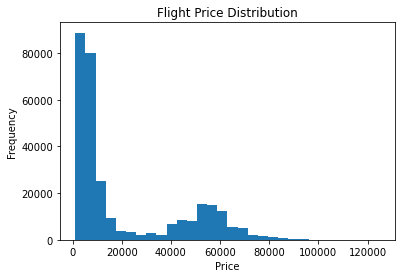

In [27]:
# Distribution of Flight Price
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(int)
df['price'].plot(kind='hist', bins=30, title='Flight Price Distribution')
plt.xlabel('Price')
plt.show()

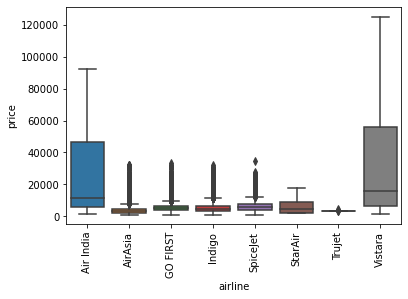

In [28]:
# Comparison of flight prices by airlines
sns.boxplot(data=df, x='airline', y='price')
plt.xticks(rotation=90)
plt.show()

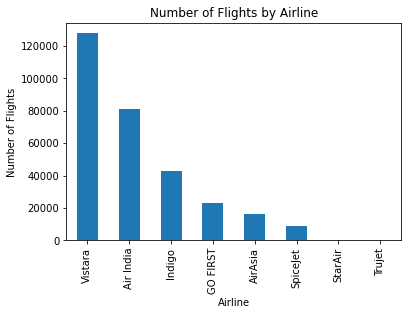

In [29]:
# Number of flights for each airlines
df['airline'].value_counts().plot(kind='bar', title='Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()

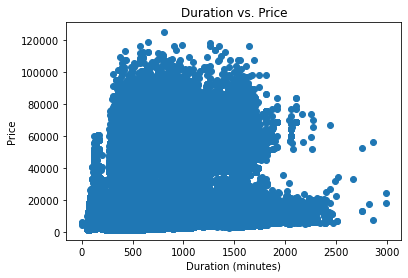

In [30]:
plt.scatter(df['duration_minutes'], df['price'])
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Duration vs. Price')
plt.show()